For the given data of the covid-19 Australia there are five columns in the cases files of five states and there are four columns in the death files of the states. 
From the given data we can observe that the 'DATE' column is common for all the files. The required files are read and the libraries are imported for performing the analysis. 
The delimter , is removed  and - is removed and replaced by 0 and the data is merged with DATE column. The empty rows are filled with 0, the string object is converted into integer type. 
Once the data is merged then the daily date till september 9th is converted into weekly data and the analysis is performed on weekly basis. 
The histogram plot analysis is used for discussing the distrubutions of new cases and deaths weekly in numbers.
A line graph is used for analysing the cumulative cases in the five states of australia. 
A line plot and scatter plot is used for normalizing the data.

In [1]:
#The below code imports the libraries pandas, numpy and seaborn. 
'''Then the code reads the data from the tsv files using the pandas read_csv function, where each file corresponds to covid-19
cases or deaths for a specific state in australia'''
'''The parse date parameter is used to ensure the date column in each file correctly parsed as a datetime object'''
'''The resulting dataframes are assigned to variables with single letter names for each state'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('daily_cases_nsw.tsv', sep='\t', parse_dates=['DATE'])
af = pd.read_csv('daily_cases_qld.tsv', sep='\t', parse_dates=['DATE'])
bf = pd.read_csv('daily_cases_sa.tsv', sep='\t', parse_dates=['DATE'])
cf = pd.read_csv('daily_cases_vic.tsv', sep='\t', parse_dates=['DATE'])
ef = pd.read_csv('daily_cases_wa.tsv', sep='\t', parse_dates=['DATE'])
ff = pd.read_csv('daily_death_qld.tsv', sep='\t', parse_dates=['DATE'])
gf = pd.read_csv('daily_death_nsw.tsv', sep='\t', parse_dates=['DATE'])
jf = pd.read_csv('daily_death_sa.tsv', sep='\t', parse_dates=['DATE'])
lf = pd.read_csv('daily_death_vic.tsv', sep='\t', parse_dates=['DATE'])
nf = pd.read_csv('daily_death_wa.tsv', sep='\t', parse_dates=['DATE'])


The below code is created for performing data cleaning and manipulation on all the data frames

In [2]:
df['NEW'] = df['NEW'].fillna('0')
df['NEW'] = df['NEW'].str.replace(',', '')
df['NEW'] = df['NEW'].astype(int)
df['NEW'] = df['NEW'].astype(str).str.replace('-', '0')
af['NEW'] = af['NEW'].fillna('0')
af['NEW'] = pd.to_numeric(af['NEW'], errors='coerce').fillna(0).astype(int)
af['NEW'] = af['NEW'].astype(str).str.replace(",", "")
af['NEW'] = af['NEW'].astype(str).str.replace('-', '0')
bf["NEW"] = pd.to_numeric(bf["NEW"], errors="coerce")
bf["NEW"] = bf["NEW"].fillna(0)
bf["NEW"] = bf["NEW"].astype(int)
cf['NEW'] = pd.to_numeric(cf['NEW'], errors='coerce')
cf['NEW'].fillna(0, inplace=True)
cf['NEW'] = cf['NEW'].astype(int)
ef['NEW'] = ef['NEW'].astype(str).str.replace(",", "").fillna('0').str.replace("-", "0")
ef.loc[ef['NEW'] == 'nan', 'NEW'] = 0
ef['NEW'] = ef['NEW'].astype(int)



The below code blocks is used for converting and cleaning up the "NET" column in the dataframes.

In [3]:
gf['NET'] = gf['NET'].astype(str).str.replace(",", "")
gf['NET'] = gf['NET'].str.replace('-', '0')
gf['NET'] = gf['NET'].astype(int)


In [4]:
ff['NET'] = ff['NET'].astype(str).str.replace(",", "")
ff['NET'] = ff['NET'].str.replace('-', '0')
ff['NET'] = ff['NET'].astype(int)


In [5]:
jf['NET'] = jf['NET'].astype(str)
jf['NET'] = jf['NET'].str.replace(",", "")
jf['NET'] = jf['NET'].str.replace('-', '0')
jf['NET'] = jf['NET'].astype(int)


In [6]:
if lf['NET'].dtype != 'object':
    lf['NET'] = lf['NET'].astype(str)

lf['NET'] = lf['NET'].str.replace(",", "")
lf['NET'] = lf['NET'].str.replace('-', '0')
lf['NET'] = lf['NET'].astype(int)


In [7]:
nf['NET'] = nf['NET'].astype(str)
nf['NET'] = nf['NET'].str.replace(",", "")
nf['NET'] = nf['NET'].str.replace('-', '0')
nf['NET'] = nf['NET'].astype(int)


In [8]:
'''df contains daily cases data for New South Wales and gf contains daily death data for New South Wales, 
then merging these data frames using the DATE column will produce a new data frame merged_df with columns
for daily cases and daily deaths in New South Wales, both of which are indexed by date.'''
merged_df = pd.merge(df, gf, on='DATE')

In [9]:
merged1_df = pd.merge(af, ff, on='DATE')

In [10]:
merged2_df = pd.merge(bf, jf, on='DATE')

In [11]:
merged3_df = pd.merge(cf, lf, on='DATE')

In [12]:
merged4_df = pd.merge(ef, nf, on='DATE')

In [13]:
merged_df.set_index('DATE', inplace=True)
merged_df
merged1_df
merged2_df
merged3_df
merged4_df

,DATE,NEW,CASES,VAR_x,NET_x,DEATHS,VAR_y,NET_y
0,2023-03-24,0,"1,298,606",NaN,-,985,NaN,0
1,2023-03-17,2625,"1,298,606",NaN,"2,609",985,NaN,29
2,2023-03-10,2546,"1,295,997",NaN,"2,536",956,NaN,4
3,2023-03-03,2390,"1,293,461",NaN,"2,384",952,NaN,8
4,2023-02-24,2278,"1,291,077",NaN,"2,269",944,NaN,2
...,...,...,...,...,...,...,...,...
982,2020-01-29,0,0,NaN,0,0,NaN,0
983,2020-01-28,0,0,NaN,0,0,NaN,0
984,2020-01-27,0,0,NaN,0,0,NaN,0
985,2020-01-26,0,0,NaN,0,0,NaN,0


In [14]:
weekly_df = merged_df.resample('W').sum()
merged_df['state']="nsw"
weekly_df

,VAR_x,VAR_y,NET_y
DATE,,,
2020-01-26,0.0,0.0,0
2020-02-02,0.0,0.0,0
2020-02-09,0.0,0.0,0
2020-02-16,0.0,0.0,0
2020-02-23,0.0,0.0,0
...,...,...,...
2023-02-26,0.0,0.0,47
2023-03-05,0.0,0.0,29
2023-03-12,0.0,0.0,36


In [15]:
merged1_df.set_index('DATE', inplace=True)

In [16]:
weekly1_df = merged1_df.resample('W').sum()
merged1_df['state']="qld"
weekly1_df

,VAR_x,VAR_y,NET_y
DATE,,,
2020-01-26,0.0,0.0,0
2020-02-02,0.0,0.0,0
2020-02-09,0.0,0.0,0
2020-02-16,0.0,0.0,0
2020-02-23,0.0,0.0,0
...,...,...,...
2023-02-26,0.0,0.0,26
2023-03-05,0.0,0.0,23
2023-03-12,0.0,0.0,13


In [17]:
merged2_df.set_index('DATE', inplace=True)

In [18]:
weekly2_df = merged2_df.resample('W').sum()
merged2_df['state']="sa"
weekly2_df

,NEW,VAR_x,VAR_y,NET_y
DATE,,,,
2020-01-26,0,0.0,0.0,0
2020-02-02,2,0.0,0.0,0
2020-02-09,0,0.0,0.0,0
2020-02-16,0,0.0,0.0,0
2020-02-23,1,0.0,0.0,0
...,...,...,...,...
2023-02-26,0,0.0,0.0,0
2023-03-05,0,0.0,0.0,0
2023-03-12,0,0.0,0.0,43


In [19]:
merged3_df.set_index('DATE', inplace=True)

In [20]:
weekly3_df = merged3_df.resample('W').sum()
merged3_df['state']="vic"
weekly3_df

,NEW,VAR_x,VAR_y,NET_y
DATE,,,,
2020-01-26,0,0.0,0.0,0
2020-02-02,3,0.0,0.0,0
2020-02-09,0,0.0,0.0,0
2020-02-16,0,0.0,0.0,0
2020-02-23,0,0.0,0.0,0
...,...,...,...,...
2023-02-26,0,0.0,0.0,31
2023-03-05,0,0.0,0.0,21
2023-03-12,0,0.0,0.0,32


In [21]:
merged4_df.set_index('DATE', inplace=True)

In [22]:
weekly4_df = merged4_df.resample('W').sum()
merged4_df['state']="wa"
weekly4_df

,NEW,VAR_x,DEATHS,VAR_y,NET_y
DATE,,,,,
2020-01-26,0,0.0,0,0.0,0
2020-02-02,0,0.0,0,0.0,0
2020-02-09,0,0.0,0,0.0,0
2020-02-16,0,0.0,0,0.0,0
2020-02-23,1,0.0,0,0.0,0
...,...,...,...,...,...
2023-02-26,2278,0.0,944,0.0,2
2023-03-05,2390,0.0,952,0.0,8
2023-03-12,2546,0.0,956,0.0,4


In [23]:



weekly_df['NEW'] = weekly_df['NET_y'].astype(int)
weekly1_df['NEW'] = weekly1_df['NET_y'].astype(int)
weekly2_df['NEW'] = weekly2_df['NET_y'].astype(int)
weekly3_df['NEW'] = weekly3_df['NET_y'].astype(int)
weekly4_df['NEW'] = weekly4_df['NET_y'].astype(int)
df_concatenated = pd.concat([weekly_df, weekly_df, weekly_df, weekly_df, weekly_df], axis=1)
df_concatenated

,VAR_x,VAR_y,NET_y,NEW,VAR_x,VAR_y,NET_y,NEW,VAR_x,VAR_y,NET_y,NEW,VAR_x,VAR_y,NET_y,NEW,VAR_x,VAR_y,NET_y,NEW
DATE,,,,,,,,,,,,,,,,,,,,
2020-01-26,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0
2020-02-02,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0
2020-02-09,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0
2020-02-16,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0
2020-02-23,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-26,0.0,0.0,47,47,0.0,0.0,47,47,0.0,0.0,47,47,0.0,0.0,47,47,0.0,0.0,47,47
2023-03-05,0.0,0.0,29,29,0.0,0.0,29,29,0.0,0.0,29,29,0.0,0.0,29,29,0.0,0.0,29,29
2023-03-12,0.0,0.0,36,36,0.0,0.0,36,36,0.0,0.0,36,36,0.0,0.0,36,36,0.0,0.0,36,36


In [24]:
weekly_df

,VAR_x,VAR_y,NET_y,NEW
DATE,,,,
2020-01-26,0.0,0.0,0,0
2020-02-02,0.0,0.0,0,0
2020-02-09,0.0,0.0,0,0
2020-02-16,0.0,0.0,0,0
2020-02-23,0.0,0.0,0,0
...,...,...,...,...
2023-02-26,0.0,0.0,47,47
2023-03-05,0.0,0.0,29,29
2023-03-12,0.0,0.0,36,36


# part 2

C:\Users\DELL\AppData\Local\Temp\ipykernel_22032\2401207902.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_df.kurt()


NEW       22.346344
VAR_x           NaN
VAR_y           NaN
NET_y    149.651686
dtype: float64

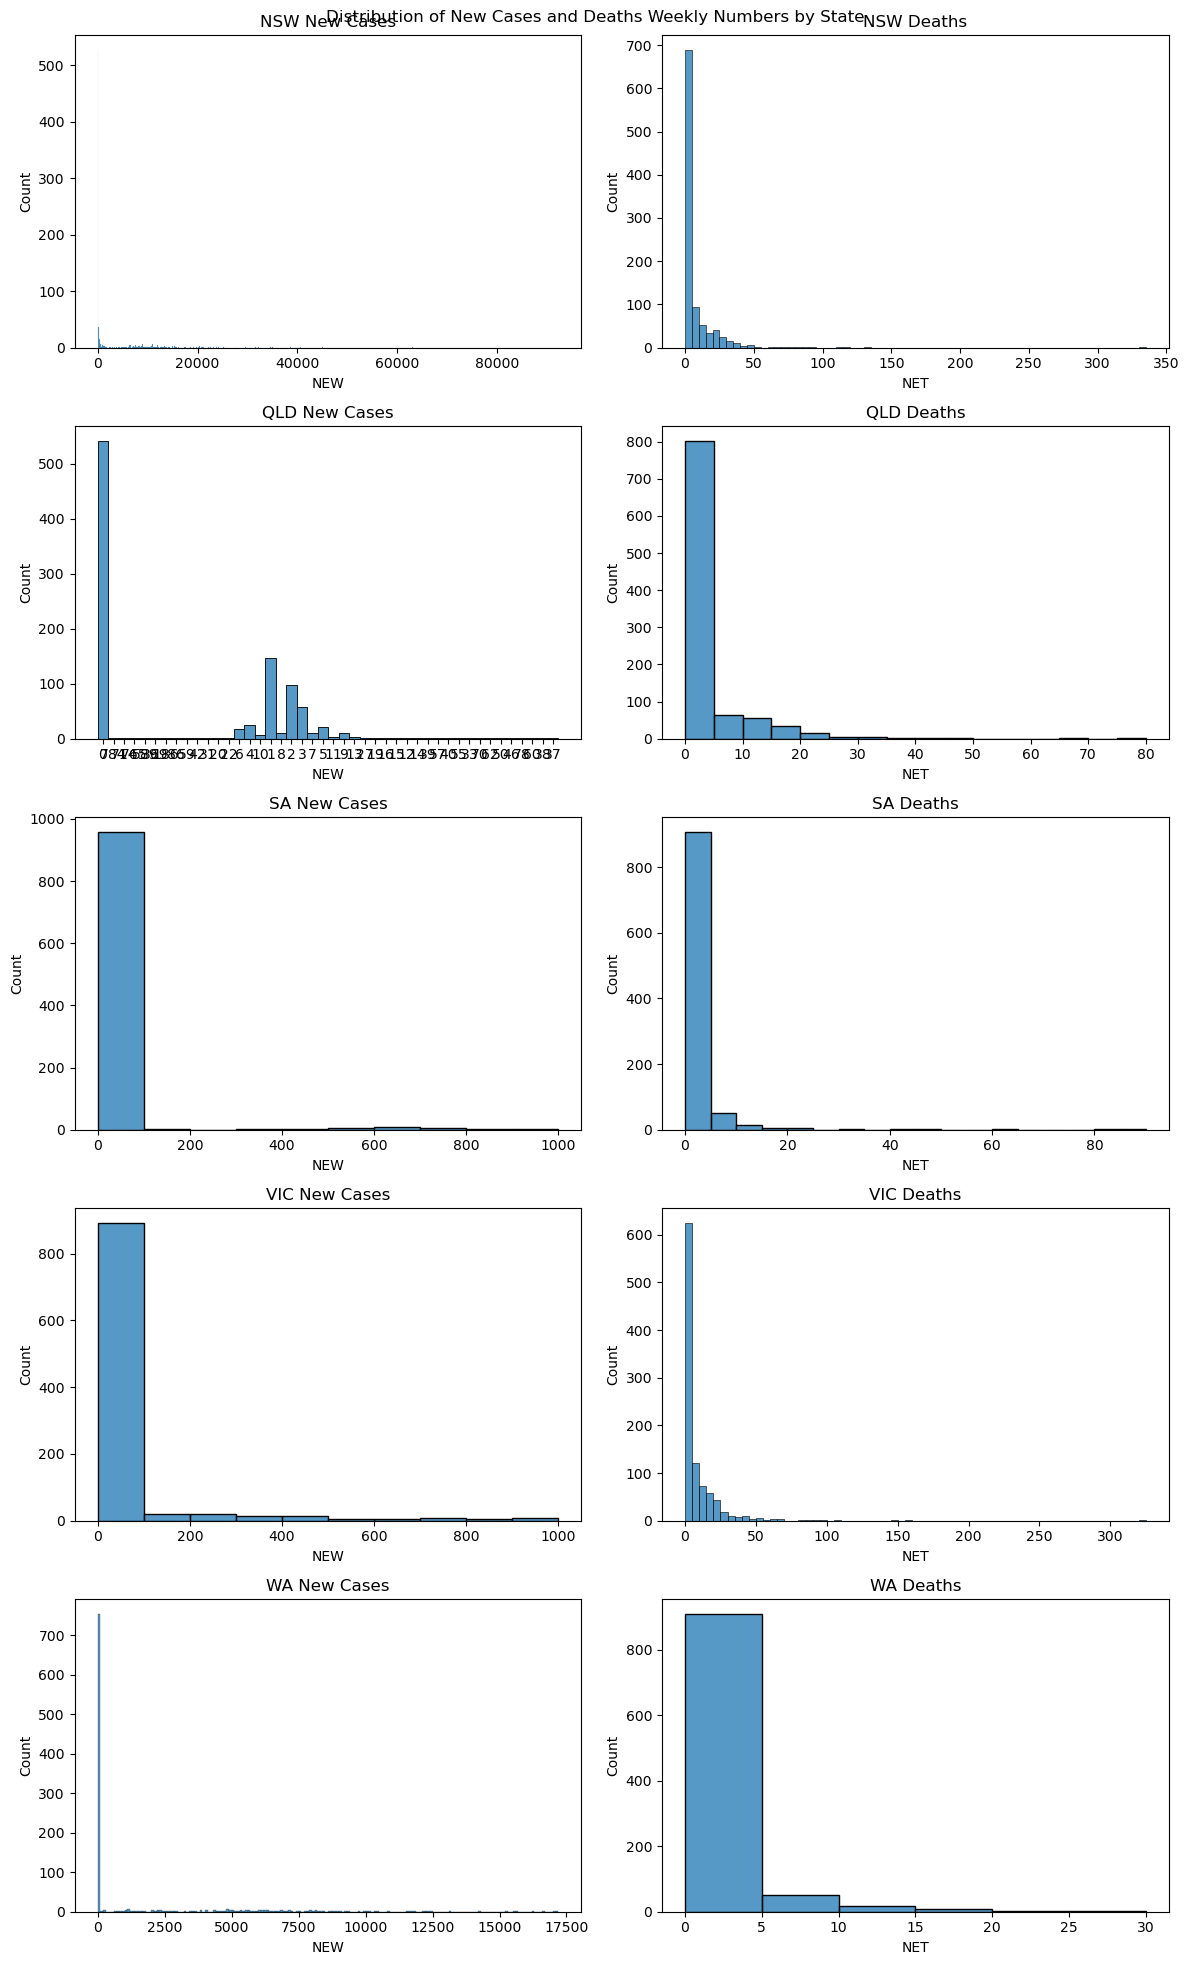

In [25]:
import matplotlib.pyplot as plt
df['NEW'] = pd.to_numeric(df['NEW'], errors='coerce')
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))
axes = axes.flatten()
for i, (state, df, gf) in enumerate([
    ('NSW', df, gf),
    ('QLD', af, ff),
    ('SA', bf, jf),
    ('VIC', cf, lf),
    ('WA', ef, nf)
]):
    sns.histplot(ax=axes[i*2], data=df, x='NEW', binwidth=100)
    axes[i*2].set_title(f'{state} New Cases')
    sns.histplot(ax=axes[i*2+1], data=gf, x='NET', binwidth=5)
    axes[i*2+1].set_title(f'{state} Deaths')
fig.suptitle('Distribution of New Cases and Deaths Weekly Numbers by State')

# Adjust spacing between subplots
fig.tight_layout()
merged_df.kurt()

The histogram plot is created for the columns cases and deaths by taking count on the y axis and NET on the x axis
From the above histogram plot we can observe that the graph is rightly skewed. With the kurtosis value obtained we can say that it is long tailed and many outliers are present in the obtained data. The number of cases gets decreased as the toal number of people increases.

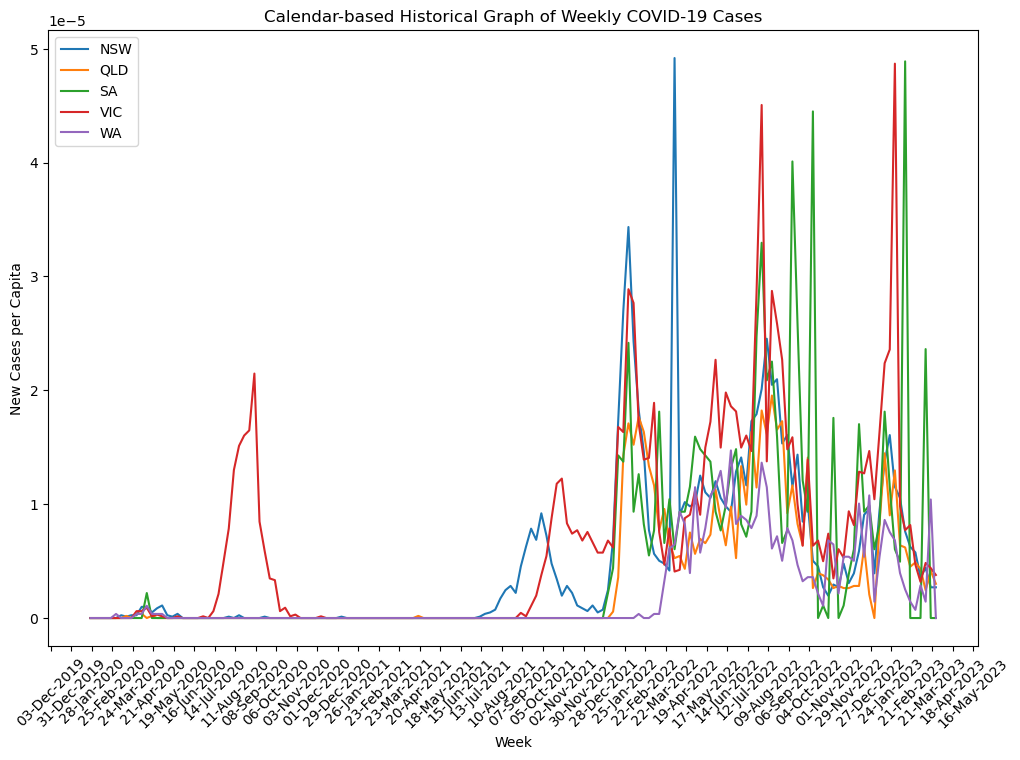

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Normalizing cases by population
populations = {'NSW': 8153600, 'QLD': 5322100, 'SA': 1820500, 'VIC': 6613700, 'WA': 2785300}

# Plotting normalized cases on a calendar-based historical graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(weekly_df.index, weekly_df['NET_y'] / populations['NSW'], label='NSW')
ax.plot(weekly1_df.index, weekly1_df['NET_y'] / populations['QLD'], label='QLD')
ax.plot(weekly2_df.index, weekly2_df['NET_y'] / populations['SA'], label='SA')
ax.plot(weekly3_df.index,weekly3_df['NET_y'] / populations['VIC'], label='VIC')
ax.plot(weekly4_df.index, weekly4_df['NET_y'] / populations['WA'], label='WA')

# Formatting the x-axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
ax.xaxis.set_tick_params(rotation=45)

# Adding labels and title
ax.set_xlabel('Week')
ax.set_ylabel('New Cases per Capita')
ax.set_title('Calendar-based Historical Graph of Weekly COVID-19 Cases')

# Adding a legend
ax.legend()

# Displaying the plot
plt.show()


The above line cummulative graph depicted after the covid 19 cases croses 1000 cases for each state. Before that we are ommitting the cases below 1000 cases. There is a significant rise in the cases after MAy 2021 for New South Wales amd also the cases increases for other states as the days goes on and gradually decreases after october 2022.  

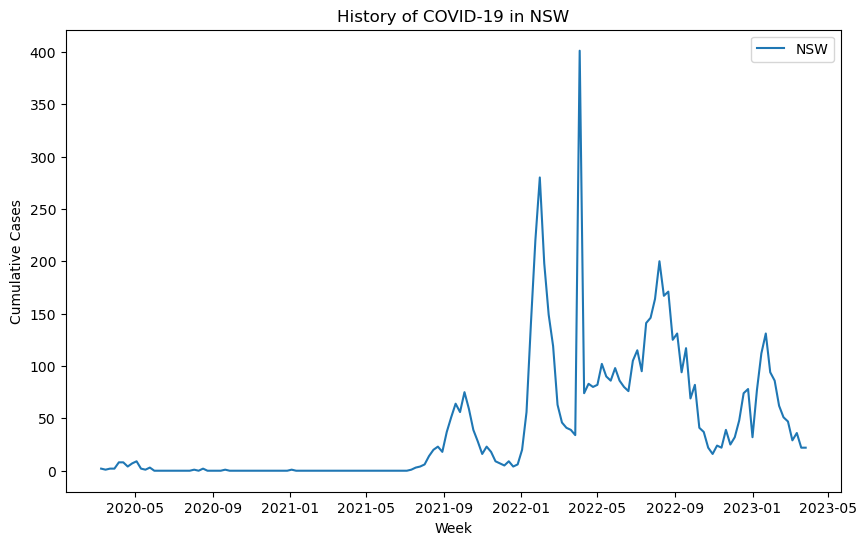

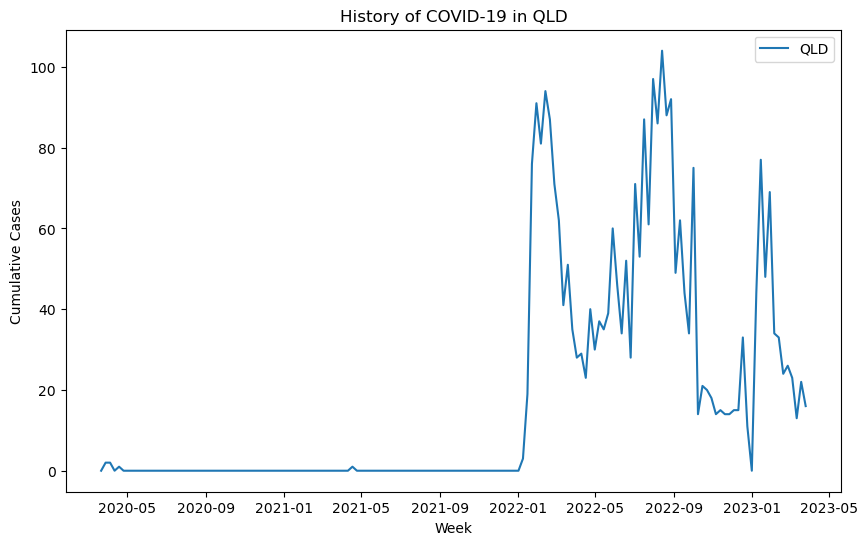

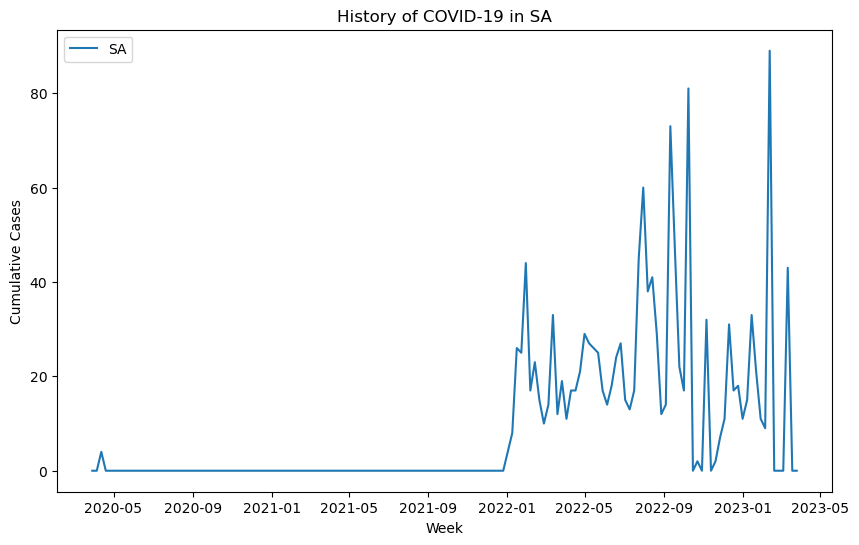

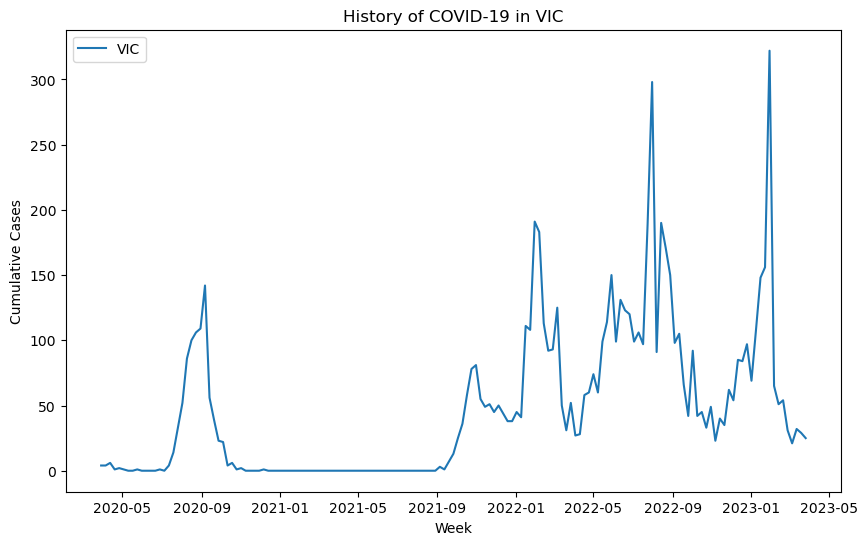

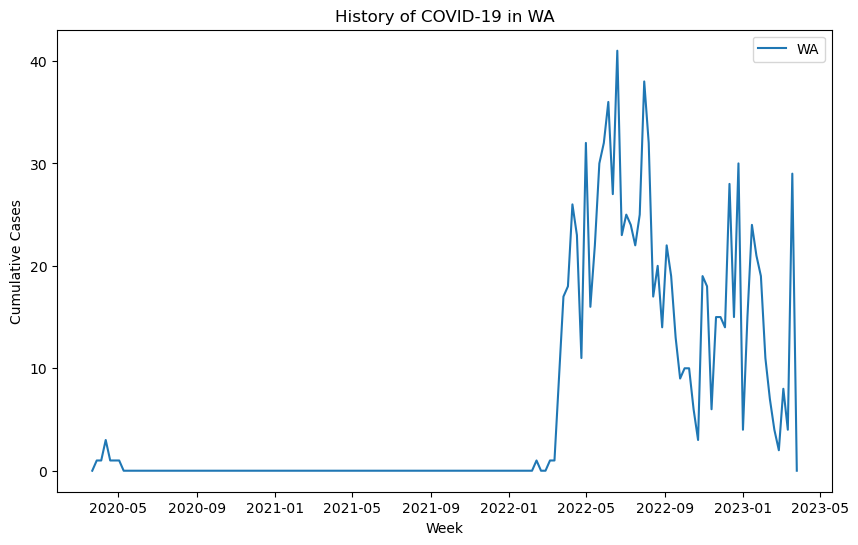

In [27]:
# For New South Wales
nsw_df = weekly_df[weekly_df.index >= '2020-03-08']  
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(nsw_df.index, nsw_df['NET_y'], label='NSW')
ax.set_xlabel('Week')
ax.set_ylabel('Cumulative Cases')
ax.set_title('History of COVID-19 in NSW')
ax.legend()
plt.show()

# QLD
qld_df = weekly1_df[weekly1_df.index >= '2020-03-22']  
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(qld_df.index, qld_df['NET_y'], label='QLD')
ax.set_xlabel('Week')
ax.set_ylabel('Cumulative Cases')
ax.set_title('History of COVID-19 in QLD')
ax.legend()
plt.show()

# SA
sa_df = weekly2_df[weekly2_df.index >= '2020-03-29'] 
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sa_df.index, sa_df['NET_y'], label='SA')
ax.set_xlabel('Week')
ax.set_ylabel('Cumulative Cases')
ax.set_title('History of COVID-19 in SA')
ax.legend()
plt.show()

# VIC
vic_df = weekly3_df[weekly3_df.index >= '2020-03-29']  
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(vic_df.index, vic_df['NET_y'], label='VIC')
ax.set_xlabel('Week')
ax.set_ylabel('Cumulative Cases')
ax.set_title('History of COVID-19 in VIC')
ax.legend()
plt.show()

# WA
wa_df = weekly4_df[weekly4_df.index >= '2020-03-22'] 
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(wa_df.index, wa_df['NET_y'], label='WA')
ax.set_xlabel('Week')
ax.set_ylabel('Cumulative Cases')
ax.set_title('History of COVID-19 in WA')
ax.legend()
plt.show()


The above normalized distrubution describes the number of cases by population for the deaths of each state. The number of cases increases for the year 2022 for each states. The similarity between the states is that the cases does not increase for the fiscal year 2020 to 2021 and gets a sudden steep increase in the year 2022. The new South wales has the highest number of cases and south australia obtains the lowest cases.

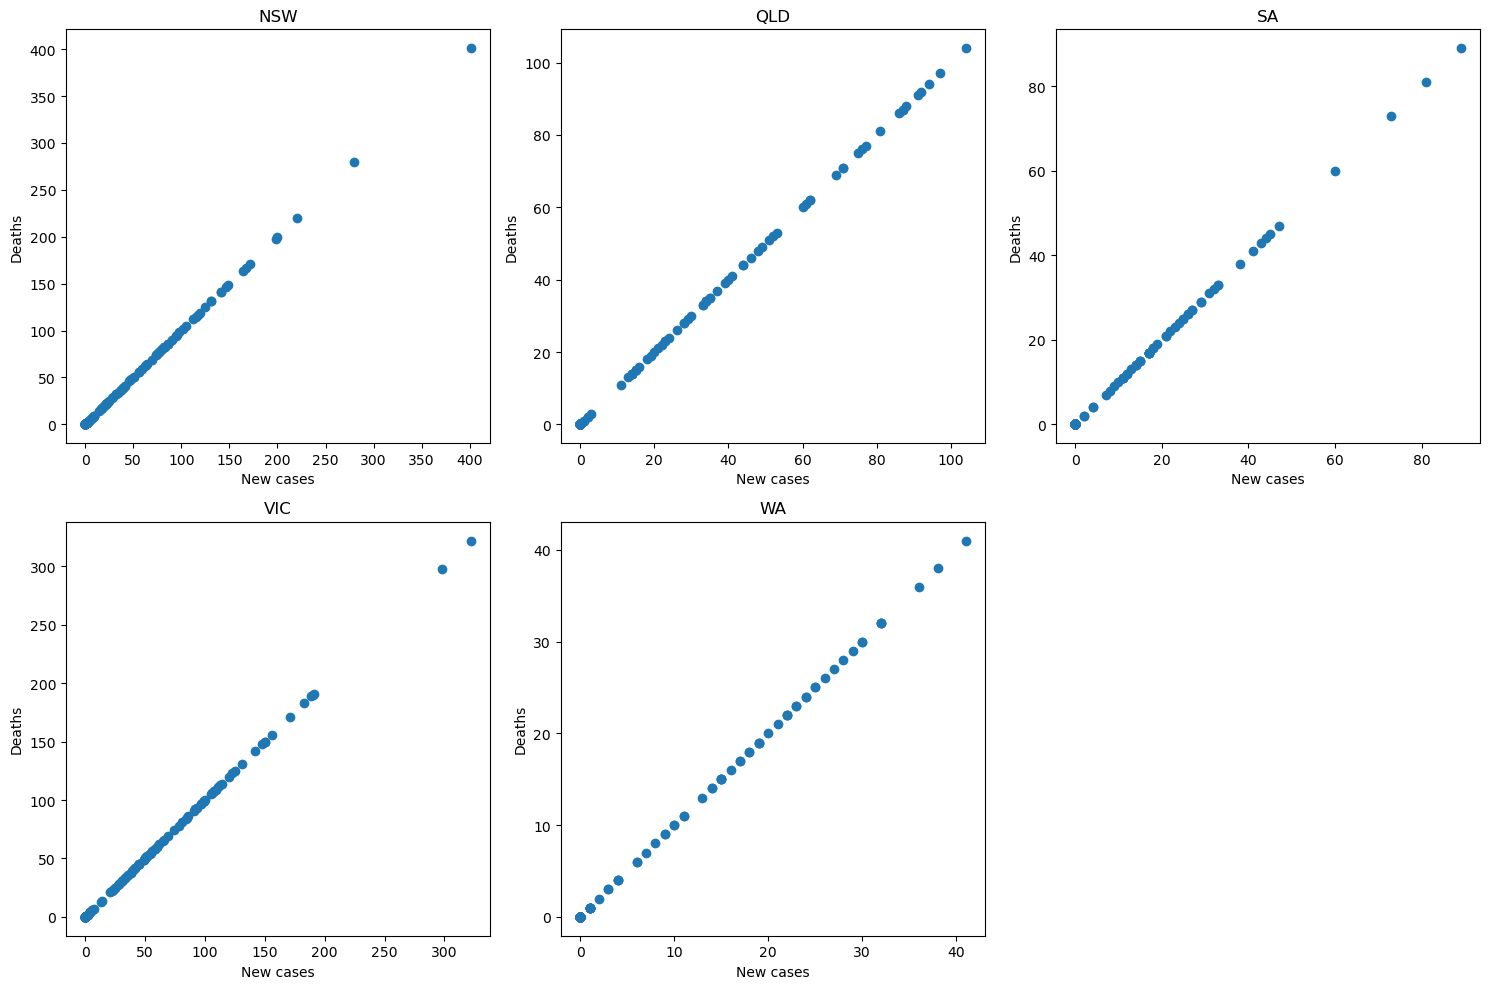

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].scatter(nsw_df['NEW'], nsw_df['NET_y'])
axs[0, 0].set_xlabel('New cases')
axs[0, 0].set_ylabel('Deaths')
axs[0, 0].set_title('NSW')
axs[0, 1].scatter(qld_df['NEW'], qld_df['NET_y'])
axs[0, 1].set_xlabel('New cases')
axs[0, 1].set_ylabel('Deaths')
axs[0, 1].set_title('QLD')
axs[0, 2].scatter(sa_df['NEW'], sa_df['NET_y'])
axs[0, 2].set_xlabel('New cases')
axs[0, 2].set_ylabel('Deaths')
axs[0, 2].set_title('SA')
axs[1, 0].scatter(vic_df['NEW'], vic_df['NET_y'])
axs[1, 0].set_xlabel('New cases')
axs[1, 0].set_ylabel('Deaths')
axs[1, 0].set_title('VIC')
axs[1, 1].scatter(wa_df['NEW'], wa_df['NET_y'])
axs[1, 1].set_xlabel('New cases')
axs[1, 1].set_ylabel('Deaths')
axs[1, 1].set_title('WA')

# Remove empty subplot
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()


From the above scatter plot we can observe that the graph which is depicted is linear. The Deaths to new cases are along a straight diagnal line with queensland have the greatest distrubution of deaths along the time period and victoria having the least deaths.


The study of the provided COVID-19 data in Australia turned up some intriguing trends and revelations. One of the main conclusions was that each state's case count dramatically increased in 2022. This means that despite efforts to prevent it, the pandemic made a comeback in 2022. The fact that there was no increase in cases between 2020 and 2021 is significant since it shows that the epidemic was mostly under control during that time.

Another intriguing discovery was that South Australia had the fewest cases overall while New South Wales had the most. Different population densities, vaccination rates, or the success of public health initiatives could all play a role in this. Additionally, it's probable that certain states had better luck than others in spotting and containing outbreaks.

The scatter plot demonstrated a linear link between fatalities and new cases, with Victoria having the lowest and Queensland having the highest distribution of deaths. Given that COVID-19 is a highly contagious and potentially fatal disease, this shows a substantial link between the number of new cases and the number of fatalities.

Overall, the examination of the COVID-19 data in Australia offers insightful information about how the pandemic is developing and how well public health initiatives are working. It also emphasises the necessity of constant observation and investigation to spot trends and patterns that can help guide policy and decision-making.

